# Statystyka w Analizie Danych

## Laboratorium 5 - algorytm normalizacja, selekcja cech.


### Opis
Celem laboratorium jest przeprowadzenie normalizacji i selekcji cech.


### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab05.ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład (na podstawie tablicy pomyłek):

**Źle** (nie wiadomo co jest poniżej zaprezentowane, kolumny ani wiersze nie są podpisane, nie wiadomo które z nich prezentują predykcje, a które właściwe etykiety):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```

### Zadanie

Należy wykonać następujące czynności w celu realizacji niniejszego zadania:

#### Normalizacja
* Wczytaj dane.
* Znormalizuj dane.
* Przeprowadź eksperyment z zastosowaniem algorytmu kNN lub NM dla danych znormalizowanych oraz bez normalizacji.
    * W eksperymencie wybierz 5 klas oraz 10 cech.
* Przedstaw porównanie wyników klasyfikacji na danych znormalizowanych i bez normalizacji.
* Napisz wnioski.

**UWAGA: Wykorzystaj gotową implementację kNN [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)**

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score, balanced_accuracy_score
import random

def normalize2(dataframe):
    return (dataframe-dataframe.min())/(dataframe.max()-dataframe.min())

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']
train = pd.DataFrame(train)
test = pd.DataFrame(test)

trainclass = train[[0]]
testclass = test[[0]]
trainfeatures = train.drop(columns = [0, 1])
testfeatures = test.drop(columns = [0,1])

# trainfeatures = normalize2(trainfeatures) #dane są normalizowane, zwiększa to znacząco efektywność modelu
# testfeatures = normalize2(testfeatures)

train = pd.concat([trainclass, trainfeatures], axis=1)
test = pd.concat([testclass, testfeatures], axis=1)

train

,0,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,36.0,0.390930,1.102500,0.733510,0.720220,0.694740,0.179540,0.076072,1.053200,0.059213,0.157470,0.024197,0.009541,0.000247,1.204200
1,5.0,0.936710,2.415100,0.729800,0.817930,0.864910,0.334390,0.080539,1.180500,0.048722,0.120510,0.014314,0.003998,0.000372,1.308300
2,29.0,0.837500,1.951200,0.490500,0.968000,0.982460,0.651380,0.016224,0.047908,0.005119,0.035621,0.001267,0.000322,0.000011,0.235140
3,35.0,0.907550,2.582000,0.623940,0.968370,0.998250,0.556740,0.031714,0.183050,0.079387,0.162130,0.025613,0.007412,0.000699,1.695100
4,32.0,0.884850,2.239800,0.557540,0.979970,0.998250,0.679740,0.009129,0.015166,0.025658,0.087206,0.007548,0.002152,0.000179,0.751540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2239,31.0,0.985425,12.367959,0.965230,0.802650,0.975840,0.043345,0.196795,7.280538,0.013304,0.035287,0.002212,0.000395,0.000086,0.316025
2240,29.0,0.732868,2.193675,0.451017,0.895804,0.917298,0.656747,0.030173,0.147090,0.012712,0.048700,0.000179,0.000484,-0.000019,0.363004
2241,12.0,0.972539,2.580435,0.604563,0.943933,0.927550,0.412375,0.027216,0.261505,0.093553,0.169002,0.032028,0.010133,0.000466,2.262180
2242,28.0,0.869988,2.412292,0.474942,0.894748,1.136941,0.723794,0.003889,0.034966,0.113536,0.209715,0.040135,0.010886,0.001081,2.261769


In [113]:
def cm(ytest, ypred, title, ax, showplot=True):

    cm = confusion_matrix(ytest, ypred)
    # tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()
    # sensitivity = tp/(tp+fn)
    # specificity = tn/(tn+fp)
    # balacc = (sensitivity+specificity)/2
    # f1score = 2*(sensitivity*specificity)/(specificity+sensitivity)

    if showplot:
        cm = ConfusionMatrixDisplay(confusion_matrix=cm)
        cm.plot(cmap='binary', ax=ax, colorbar=False)
        cm.figure_.tight_layout()
        ax.set_title(title)

        # plt.show()

In [114]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)

list_of_classes = [4, 23, 15, 10, 13]
list_of_features = [0, 2, 3, 4, 5, 7, 8, 10, 11, 13, 14]

for i in range(len(list_of_classes)):
    if i == 0:
        treningowy = train[(train[0] == list_of_classes[0])]
        testowy = test[(test[0] == list_of_classes[0])]
    else:
        treningowy = pd.concat([treningowy, train[(train[0] == list_of_classes[i])]], axis=0)
        testowy = pd.concat([testowy, test[(test[0] == list_of_classes[i])]], axis=0)

testowy = testowy.loc[:, list_of_features]
treningowy = treningowy.loc[:, list_of_features]

treningowy.reset_index(inplace=True, drop=True)
testowy.reset_index(inplace=True, drop=True)

y_train = treningowy[0]
x_train = treningowy.drop(columns = 0)

y_test = testowy[0]
x_test = testowy.drop(columns = 0)

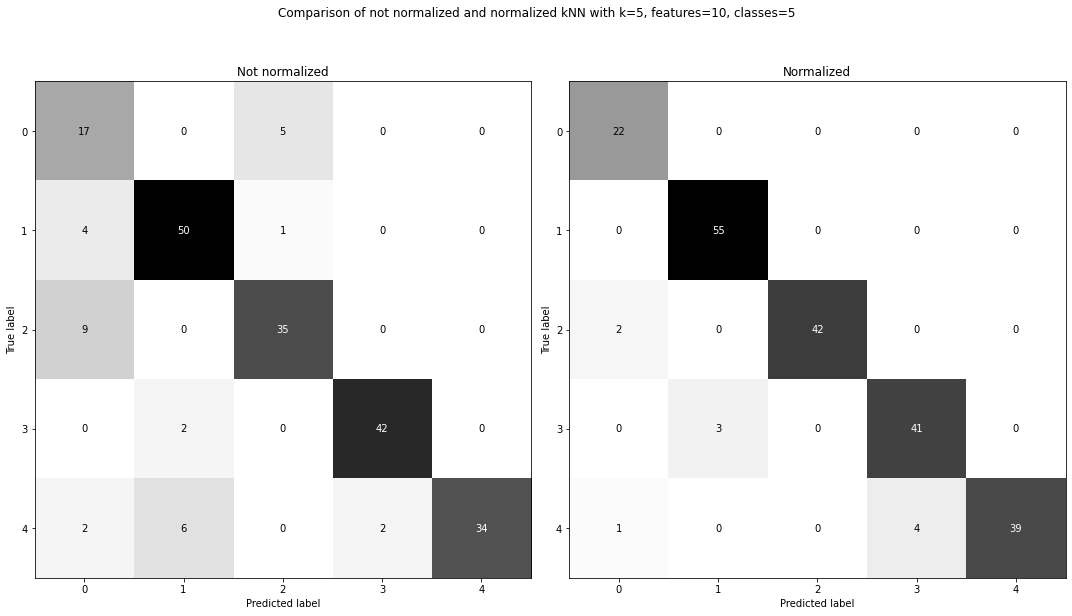

In [115]:
plt.rcParams["figure.figsize"] = (10, 10)

knn.fit(x_train, y_train)
y_predicted = knn.predict(x_test)
balacc_10_notn = balanced_accuracy_score(y_test, y_predicted)
prec = f1_score(y_test, y_predicted, average='micro')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,9))
fig.suptitle('Comparison of not normalized and normalized kNN with k=5, features=10, classes=5')

cm(y_test, y_predicted, 'Not normalized', ax=ax1)

x_train_normalized = normalize2(x_train)
x_test_normalized = normalize2(x_test)

knn.fit(x_train_normalized, y_train)
y_predicted = knn.predict(x_test_normalized)
balacc_10_n = balanced_accuracy_score(y_test, y_predicted)
prec = f1_score(y_test, y_predicted, average='micro')

cm(y_test, y_predicted, 'Normalized', ax=ax2)

Wyniki klasyfikacji widoczne w macierzy pomyłek dla próbek znormalizowanych i nieznormalizowanych różnią się pojedynczymi klasyfikacjami próbek dla wybranej populacji klas i cech, przy czym klasyfikacja z próbkami znormalizowanymi charakteryzuje się lepszym dopasowaniem etykiet.

#### Selekcja cech
Na tym samym podzbiorze danych (co w poprzednim zadaniu).
* Przeprowadź selekcję cech (wybierz {2, 5} cech) za pomocą metod poznanych na wykładzie (np. z zastosowaniem współczynnika Fishera) lub istniejących implementacji z biblioteki [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Przeprowadź klasyfikację na wybranych cechach.
* Porównaj wyniki klasyfikacji dla różnej liczby cech:
    * 10 cech bez normalizacji (wyniki z poprzedniego zadania),
    * 10 cech z normalizacją (wyniki z poprzedniego zadania),
    * 5 wybranych cech z bez normalizacji,
    * 5 wybranych cech z normalizacją,
    * 2 wybranych cech z bez normalizacji,
    * 2 wybranych cech z normalizacją.
* Opisz wyniki i napisz wnioski.


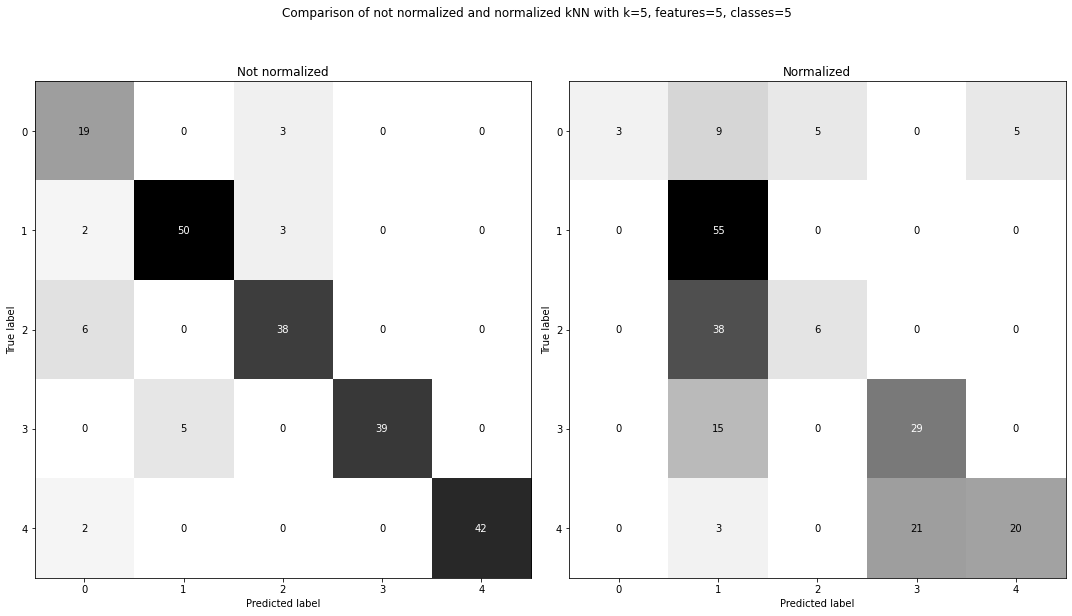

In [116]:
from sklearn.feature_selection import SelectKBest
import re

selection = SelectKBest(k=5)

x_train_new = selection.fit_transform(x_train, y_train)
feature_names = pd.DataFrame(selection.get_feature_names_out())
feature_columns = []

for i in range(len(feature_names)):
    feature_columns.append(x_train.columns[int(re.sub(r'.', '', feature_names.at[i,0], count = 1))])

x_test_new = x_test.loc[:, feature_columns]

knn.fit(x_train_new, y_train)
y_predicted = knn.predict(x_test_new)
balacc_5_notn = balanced_accuracy_score(y_test, y_predicted)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,9))
fig.suptitle('Comparison of not normalized and normalized kNN with k=5, features=5, classes=5')

cm(y_test, y_predicted, 'Not normalized', ax=ax1)

x_train_new_normalized = normalize2(x_train_new)
x_test_new_normalized = normalize2(x_test_new)

knn.fit(x_train_new_normalized, y_train)
y_predicted = knn.predict(x_test_new_normalized)
balacc_5_n = balanced_accuracy_score(y_test, y_predicted)

cm(y_test, y_predicted, 'Normalized', ax=ax2)

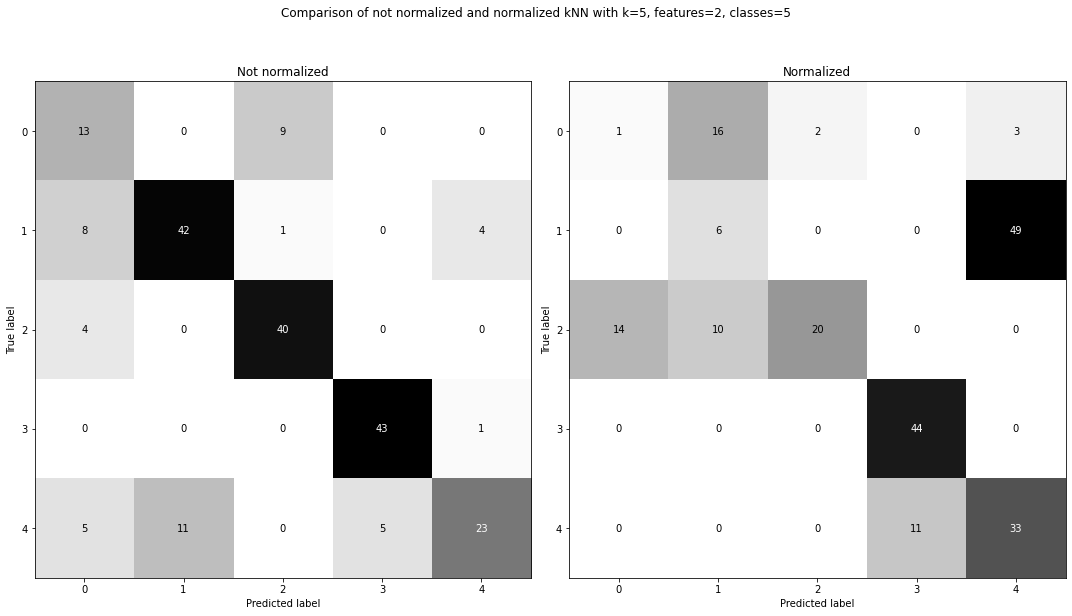

In [117]:
selection = SelectKBest(k=2)

x_train_new = selection.fit_transform(x_train, y_train)
feature_names = pd.DataFrame(selection.get_feature_names_out())
feature_columns = []

for i in range(len(feature_names)):
    feature_columns.append(x_train.columns[int(re.sub(r'.', '', feature_names.at[i,0], count = 1))])

x_test_new = x_test.loc[:, feature_columns]

knn.fit(x_train_new, y_train)
y_predicted = knn.predict(x_test_new)
balacc_2_notn = balanced_accuracy_score(y_test, y_predicted)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,9))
fig.suptitle('Comparison of not normalized and normalized kNN with k=5, features=2, classes=5')

cm(y_test, y_predicted, 'Not normalized', ax=ax1)

x_train_new_normalized = normalize2(x_train_new)
x_test_new_normalized = normalize2(x_test_new)

knn.fit(x_train_new_normalized, y_train)
y_predicted = knn.predict(x_test_new_normalized)
balacc_2_n = balanced_accuracy_score(y_test, y_predicted)

cm(y_test, y_predicted, 'Normalized', ax=ax2)

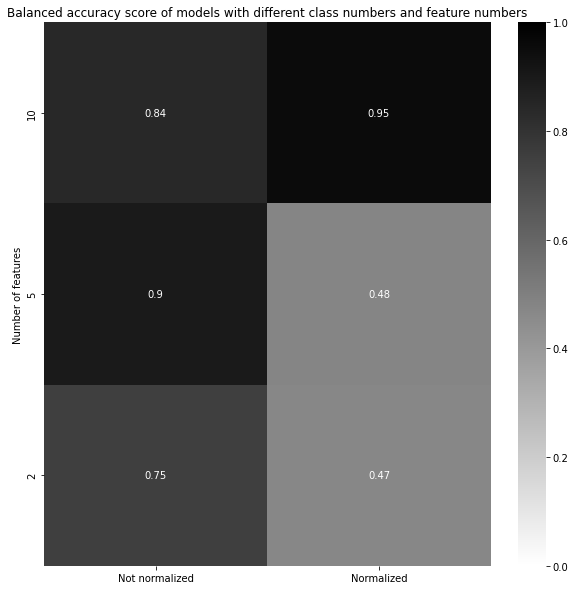

In [130]:
import seaborn as sns

data_set = pd.DataFrame([[balacc_10_notn, balacc_10_n],
                     [balacc_5_notn, balacc_5_n],
                      [balacc_2_notn, balacc_2_n]])

sns.heatmap(data_set, xticklabels=['Not normalized', 'Normalized'], yticklabels=[10,5,2], annot=True, vmin=0, vmax=1, cmap='binary')
plt.xlabel('')
plt.ylabel('Number of features')
plt.title('Balanced accuracy score of models with different class numbers and feature numbers')
plt.show()

Dla przypadku n_features = 10, n_classes = 5 normalizacja przyczyniła się do zwiększenia BAS o ponad 10%. Dla pozostałych przypadków istotnie zmniejszyła BAS, prawdopodobnie jest to spowodowane utratą informacji na temat istotnych rozbieżności między wartościami różnych cech w danych nieznormalizowanych - takie dane zachowują się jak dane ważone, gdzie ważniejsze cechy mają większe wagi. Wnioskiem z przeprowadzonego doświadczenia jest fakt, iż powinno się do tworzenia modeli kNN stosować normalizację przy użyciu jak największej liczby cech.